<a href="https://colab.research.google.com/github/nirmalvit17/CIFAR10-Image-Analysis/blob/main/CIFAR10-Image-Analysis/CIFAR_10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

Loading the dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

Dataset is split into training and testing with 50000 and 10000 in each.

The 32 and 32 show the pixels of the image and 3 represent the rgb channels

We can visualize this by using the mathplot

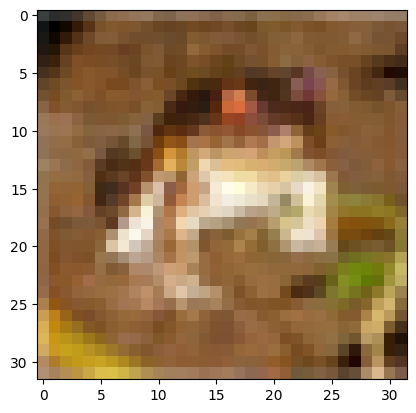

In [ ]:
plt.imshow(x_train[0])

This is supposed to be a frog


**Normalizing the data**

In [ ]:
x_train,x_test = x_train/255,x_test/255

Since pixel values in images range from 0 to 255.

In [ ]:
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)


One hot encoding y which hold cifar10 labels from 0-9

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

**Defining the CNN model**

In [ ]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

**Compiling and training the model**

In [ ]:
model = build_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 93ms/step - accuracy: 0.2717 - loss: 1.9366 - val_accuracy: 0.5004 - val_loss: 1.3752
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.4949 - loss: 1.3973 - val_accuracy: 0.5641 - val_loss: 1.2074
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.5623 - loss: 1.2430 - val_accuracy: 0.6203 - val_loss: 1.0682
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.6162 - loss: 1.1020 - val_accuracy: 0.6517 - val_loss: 1.0021
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.6395 - loss: 1.0229 - val_accuracy: 0.6570 - val_loss: 0.9748
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.6730 - loss: 0.9450 - val_accuracy: 0.6740 - val_loss: 0.9400
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.6947 - loss: 0.8827 - val_accuracy: 0.6733 - val_loss: 0.9238
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.7090 - loss: 0.8342 - 

Using epoch the model will run throught the dataset 20 times and processes 20 images at once for efficiency and validates data after each epoch

**Evaluating the Perfomance**

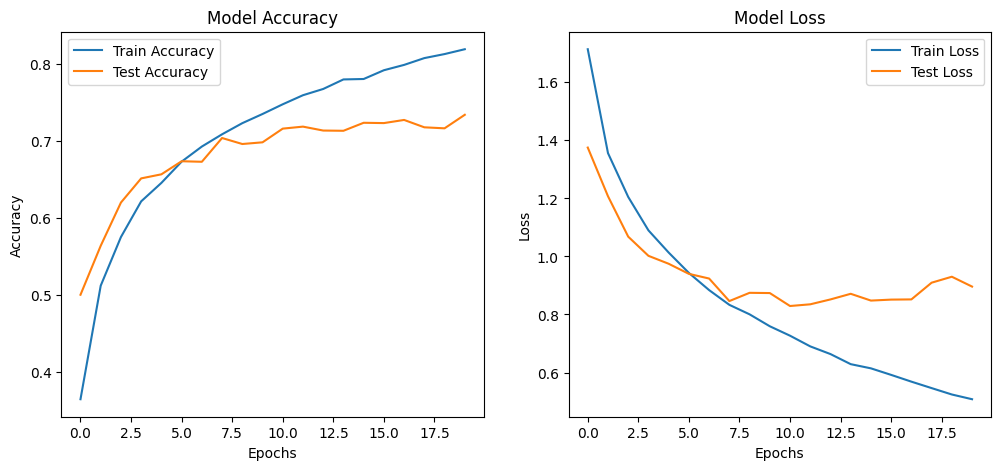

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1000
           1       0.86      0.86      0.86      1000
           2       0.65      0.62      0.63      1000
           3       0.56      0.53      0.54      1000
           4       0.67      0.70      0.69      1000
           5       0.66      0.63      0.65      1000
           6       0.81      0.79      0.80      1000
           7       0.79      0.77      0.78      1000
           8       0.75      0.90      0.82      1000
           9       0.81      0.81      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



We can see that it has an accuracy of 73%.

**Transfer Learning**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
def build_transfer_learning_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

In [ ]:
transfer_model = build_transfer_learning_model()
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_transfer = transfer_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 733s 935ms/step - accuracy: 0.4003 - loss: 1.6931 - val_accuracy: 0.5408 - val_loss: 1.3006
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 742s 936ms/step - accuracy: 0.5426 - loss: 1.3071 - val_accuracy: 0.5678 - val_loss: 1.2236
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 721s 909ms/step - accuracy: 0.5642 - loss: 1.2472 - val_accuracy: 0.5813 - val_loss: 1.1862
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 764s 937ms/step - accuracy: 0.5741 - loss: 1.2200 - val_accuracy: 0.5817 - val_loss: 1.1772
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 714s 901ms/step - accuracy: 0.5925 - loss: 1.1742 - val_accuracy: 0.5924 - val_loss: 1.1522
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 736s 941ms/step - accuracy: 0.5952 - loss: 1.1579 - val_accuracy: 0.5965 - val_loss: 1.1432
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 740s 940ms/step - accuracy: 0.6013 - loss: 1.1435 - val_accuracy: 0.6006 - val_loss: 1.1334
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 716s 906ms/step - accuracy: 0.6062 -

Evaluating the perfomance

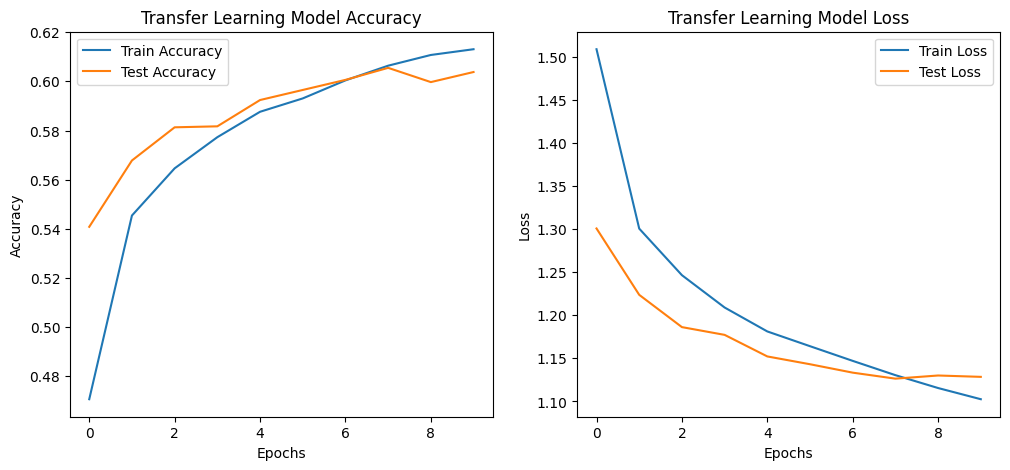

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Train Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Transfer Learning Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Train Loss')
plt.plot(history_transfer.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Transfer Learning Model Loss')
plt.show()

Summary

In [ ]:
y_pred_transfer = np.argmax(transfer_model.predict(x_test), axis=1)
print("Transfer Learning Model Classification Report:")
print(classification_report(y_true, y_pred_transfer))

313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 391ms/step
Transfer Learning Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1000
           1       0.70      0.65      0.67      1000
           2       0.53      0.50      0.51      1000
           3       0.43      0.42      0.43      1000
           4       0.54      0.52      0.53      1000
           5       0.52      0.56      0.54      1000
           6       0.58      0.73      0.65      1000
           7       0.64      0.69      0.67      1000
           8       0.76      0.70      0.73      1000
           9       0.62      0.66      0.64      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



As we can see that the transfer model has an accracy of 60%